In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import matplotlib.pyplot as plt
import librosa

audio_dir = '/kaggle/input/urbansound8k'
for fold in audio_dir:
    fold_path = os.path.join(audio_dir, fold)
    if os.path.isdir(fold_path): 
        for filename in os.listdir(fold_path):
            if filename.endswith('.wav'):
                audio_path = os.path.join(fold_path, filename)
        
                y, sr = librosa.load(audio_path, sr=16000)

                print(f"Sampling rate: {sr}")
                print(f"Audio length (seconds): {len(y)/sr:.2f}")

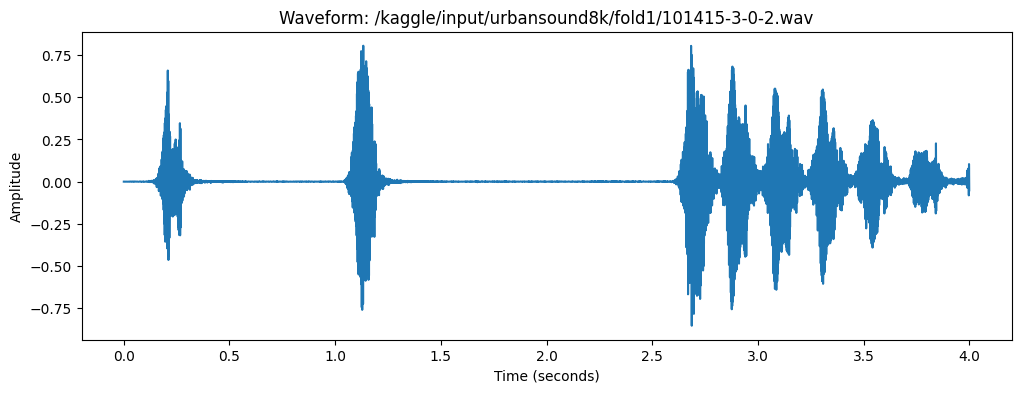

In [14]:
sample_file = '/kaggle/input/urbansound8k/fold1/101415-3-0-2.wav'
audio_path = os.path.join(fold_path, sample_file)

y, sr = librosa.load(audio_path, sr=16000)

time = np.linspace(0, len(y)/sr, num=len(y))

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(time, y)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Waveform: {sample_file}")
plt.show()

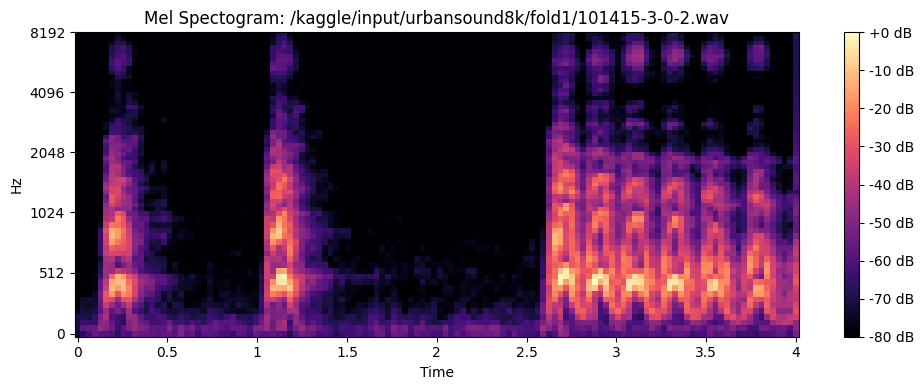

In [15]:
# Compute Mel spectrogram
mel_spec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=1024,
    hop_length=512,
    n_mels=64
)

# Convert to log scale (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_spec_db,
    sr=sr,
    hop_length=512,
    x_axis="time",
    y_axis="mel"
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"Mel Spectogram: {sample_file}")
plt.tight_layout()
plt.show()
